##**NON GRADED CHALLENGE 2**

##**BY : M RIZKI HERFIAN**

##**MATERI : SUPPORT VECTOR MACHINE (SVM)**

##**STEP 1 : IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, f1_score, roc_auc_score, roc_curve, precision_recall_curve
import time
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

**NOTE : Data yang digunakan sama dengan sebelumnya**

## **STEP 2 : LOAD DATASET**

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.shape

(5110, 12)

## **STEP 3 : DATA EXPLORATION**

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
num_cols = list(data.select_dtypes("number").drop(columns = ['id', 'stroke']).columns)

In [7]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


In [8]:
ob_cols = list(data.select_dtypes(object).columns)

In [9]:
data[ob_cols].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


##**STEP 4 : DATA CLEANING**

In [10]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [11]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data['bmi'].isnull().sum() * 100 / len(data)

3.9334637964774952

In [13]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [14]:
data['bmi'].head(10)

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
5    29.000000
6    27.400000
7    22.800000
8    28.893237
9    24.200000
Name: bmi, dtype: float64

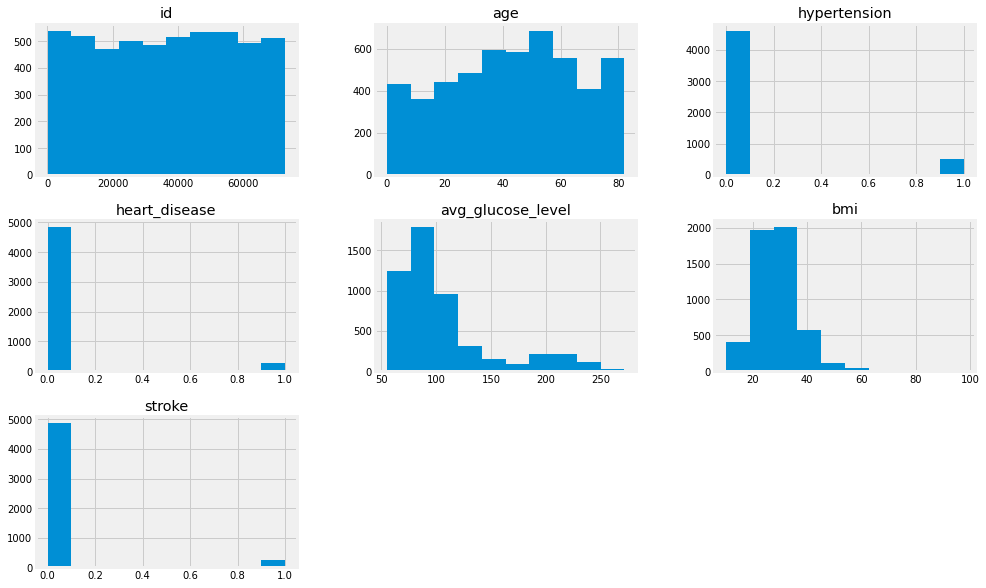

In [15]:
data.hist(figsize=(15, 10));

## **STEP 5 : DATA EXPLORATION**

In [16]:
dtc = data.copy()

In [17]:
dtc.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


## **STEP 6 : EDA VISUALIZATION**

### **Target Variable**

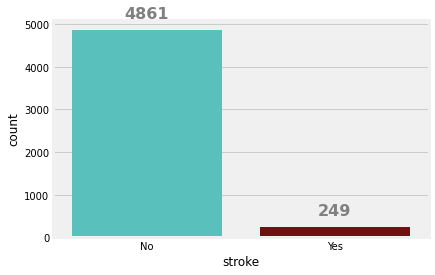

In [18]:
ax = sns.countplot(x = dtc['stroke'],palette = {1:"maroon", 0:"mediumturquoise"})
ax.set_xticklabels(["No", "Yes"])

# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, 12), 
        textcoords = 'offset points',
        color = 'grey'
   )

plt.show()      

### **Numerical Columns**

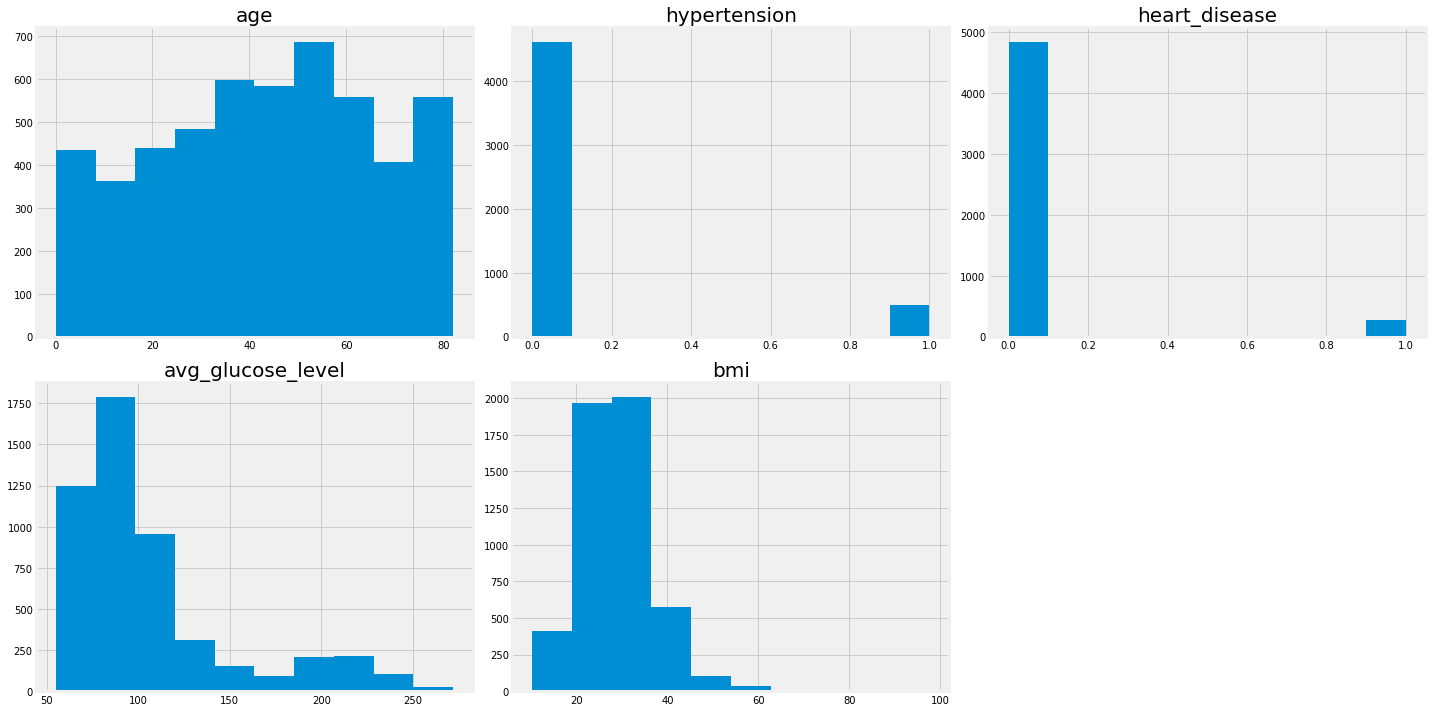

In [19]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    plt.hist(dtc[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

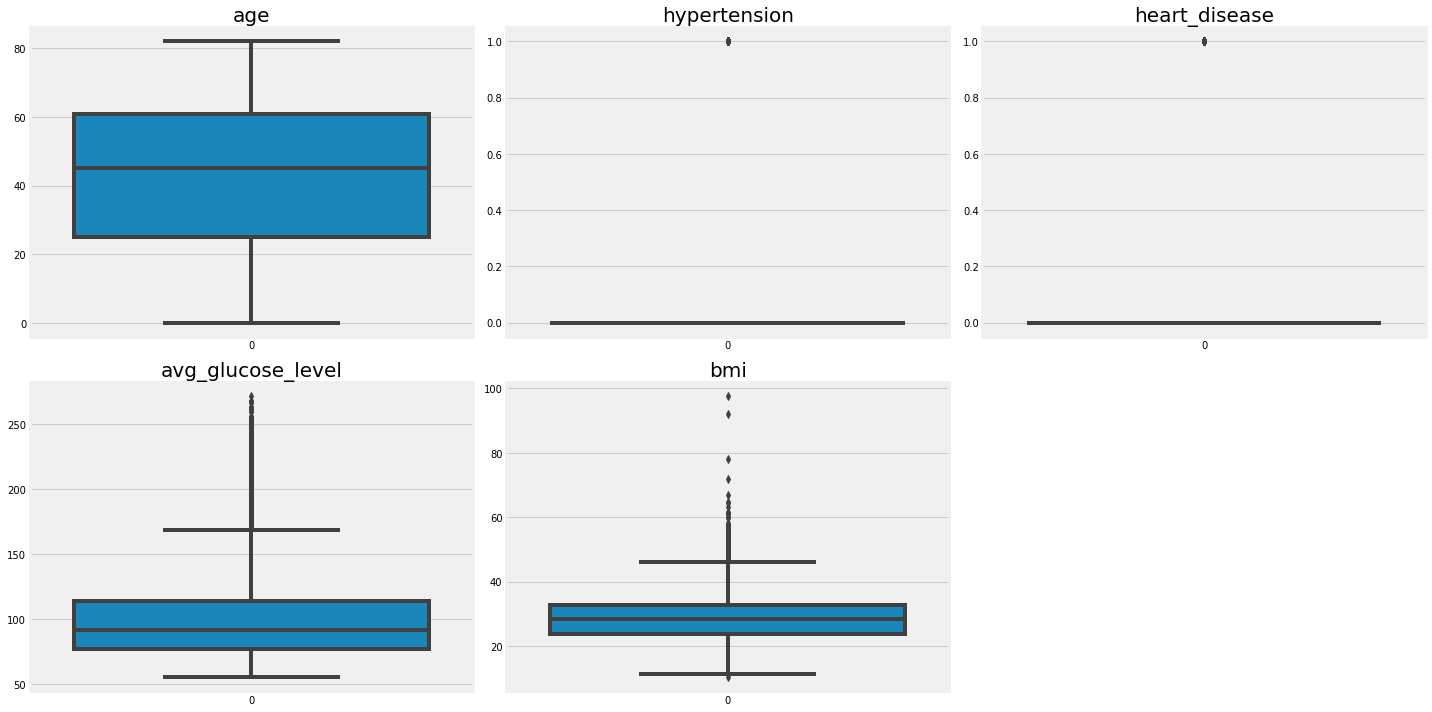

In [20]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(data = dtc[num_cols[i]])
    plt.title(num_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

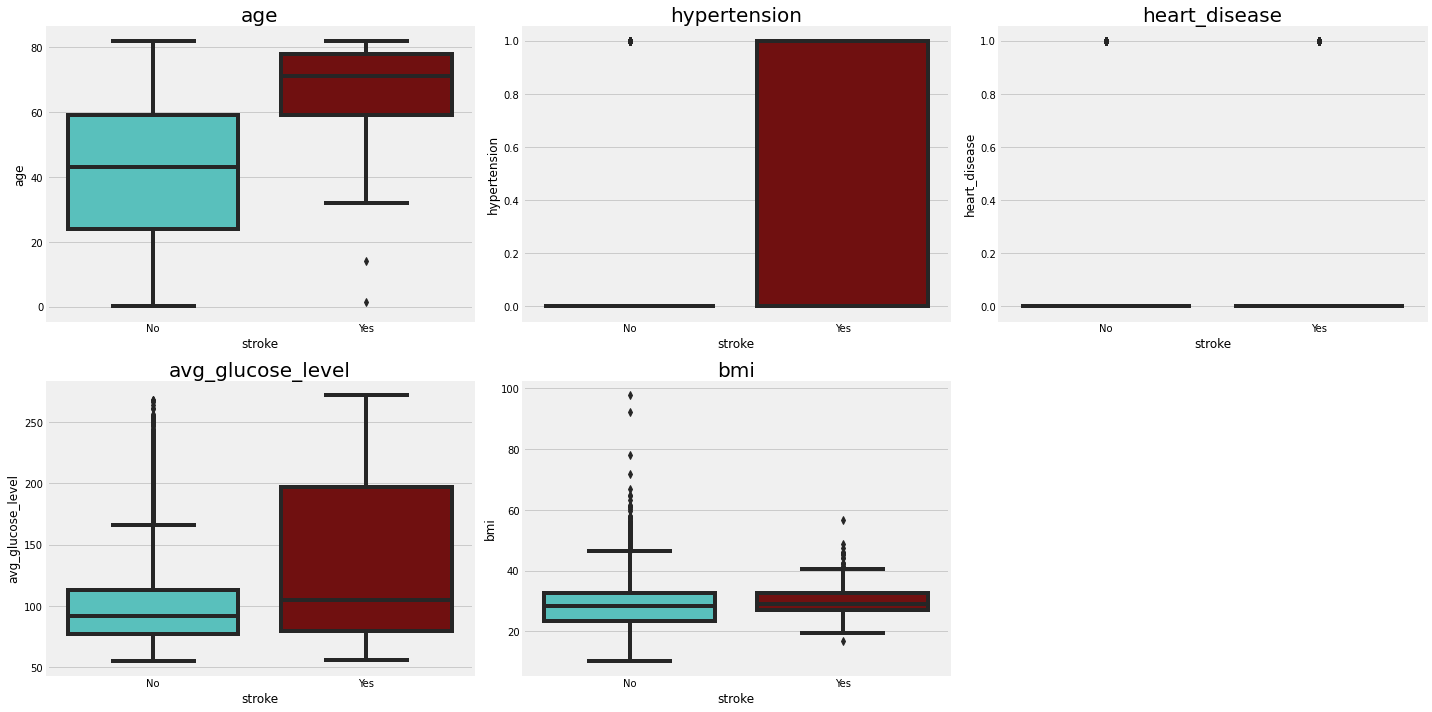

In [21]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    ax = sns.boxplot(y = dtc[num_cols[i]], x = dtc['stroke'], palette = {1:"maroon", 0:"mediumturquoise"})
    ax.set_title(num_cols[i], fontsize = 20)
    ax.set_xticklabels(["No", "Yes"])
plt.tight_layout()
plt.show()

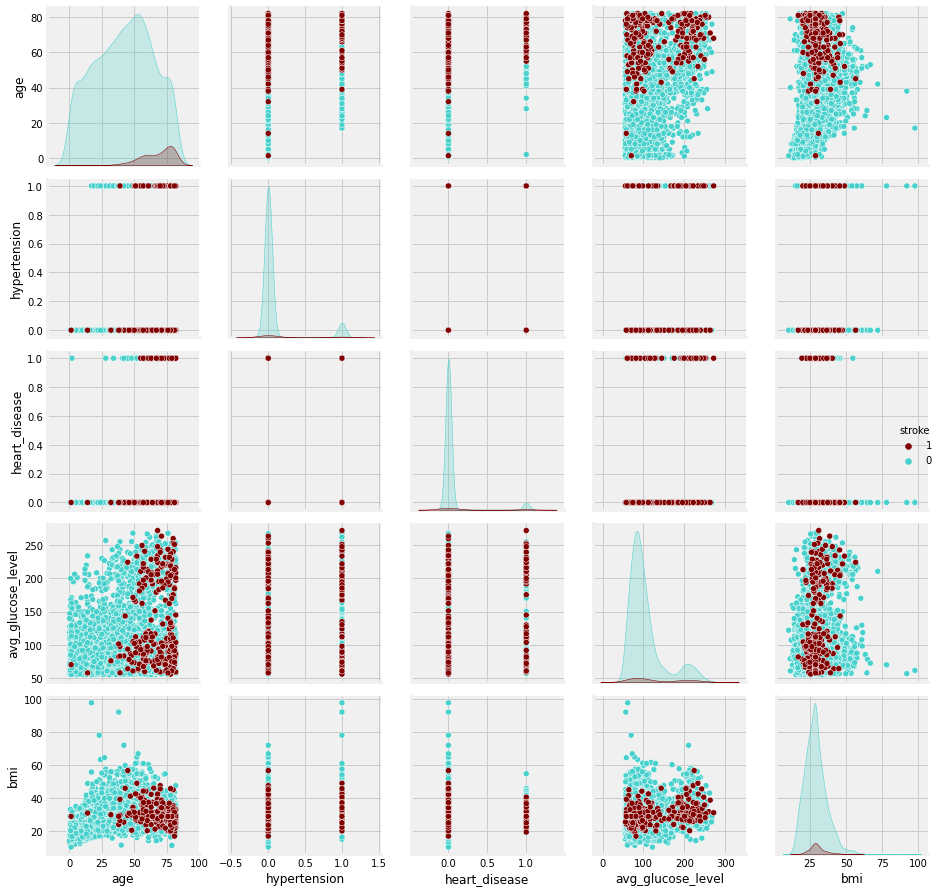

In [22]:
dtc_sort = dtc.sort_values(["stroke"], ascending = True)
ax = sns.pairplot(
    dtc_sort[num_cols + ["stroke"]],
    hue = "stroke",
    hue_order = [1, 0],
    palette = {1:"maroon", 0:"mediumturquoise"},
    kind="scatter", plot_kws={"edgecolor":"white"},
)
plt.tight_layout()
plt.show()

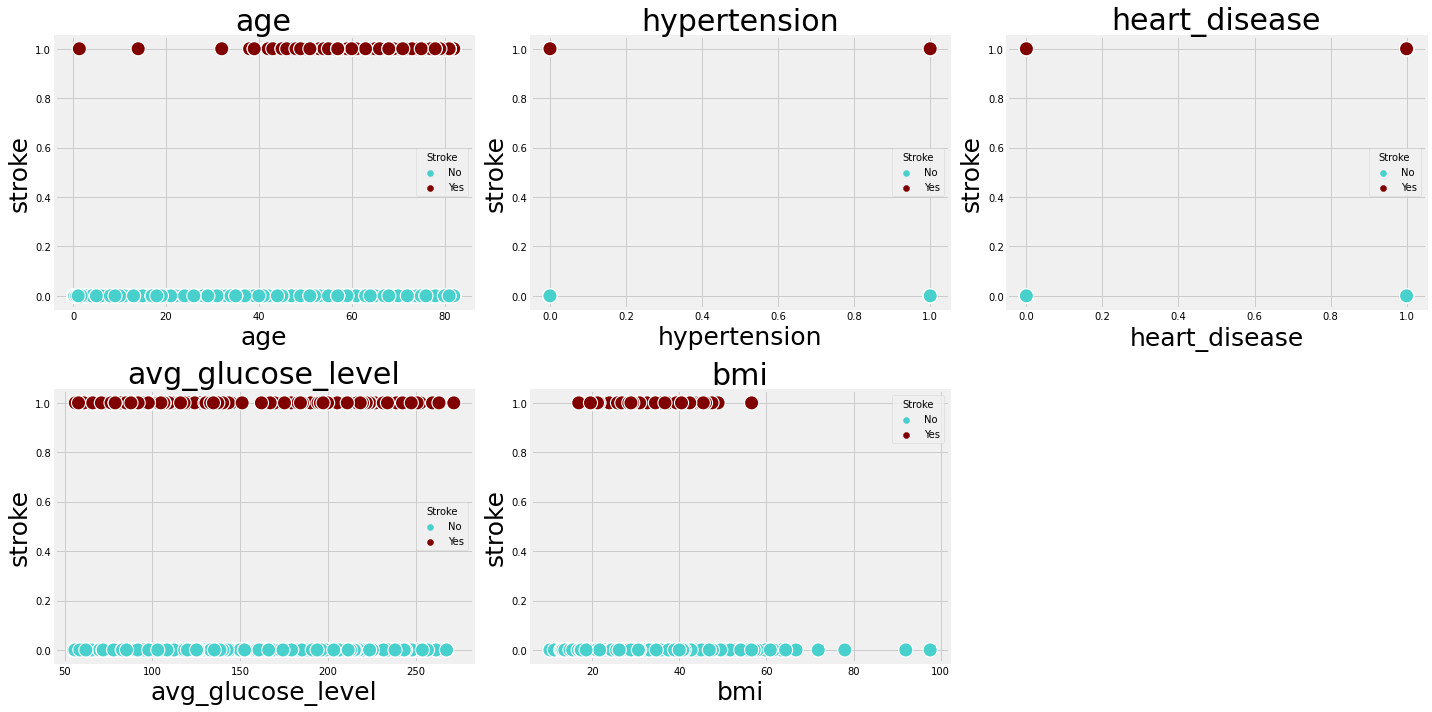

In [23]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    ax = sns.scatterplot(x = dtc[num_cols[i]], y = dtc['stroke'], hue = dtc['stroke'], s = 200, palette = {1:"maroon", 0:"mediumturquoise"})
    ax.set_title(num_cols[i], fontsize = 30)
    ax.set_xlabel(xlabel=num_cols[i], fontsize=25)
    ax.set_ylabel(ylabel="stroke",fontsize=25)
    
    L = ax.legend(title="Stroke")
    L.get_texts()[0].set_text('No')
    L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

### **Categorical Columns**

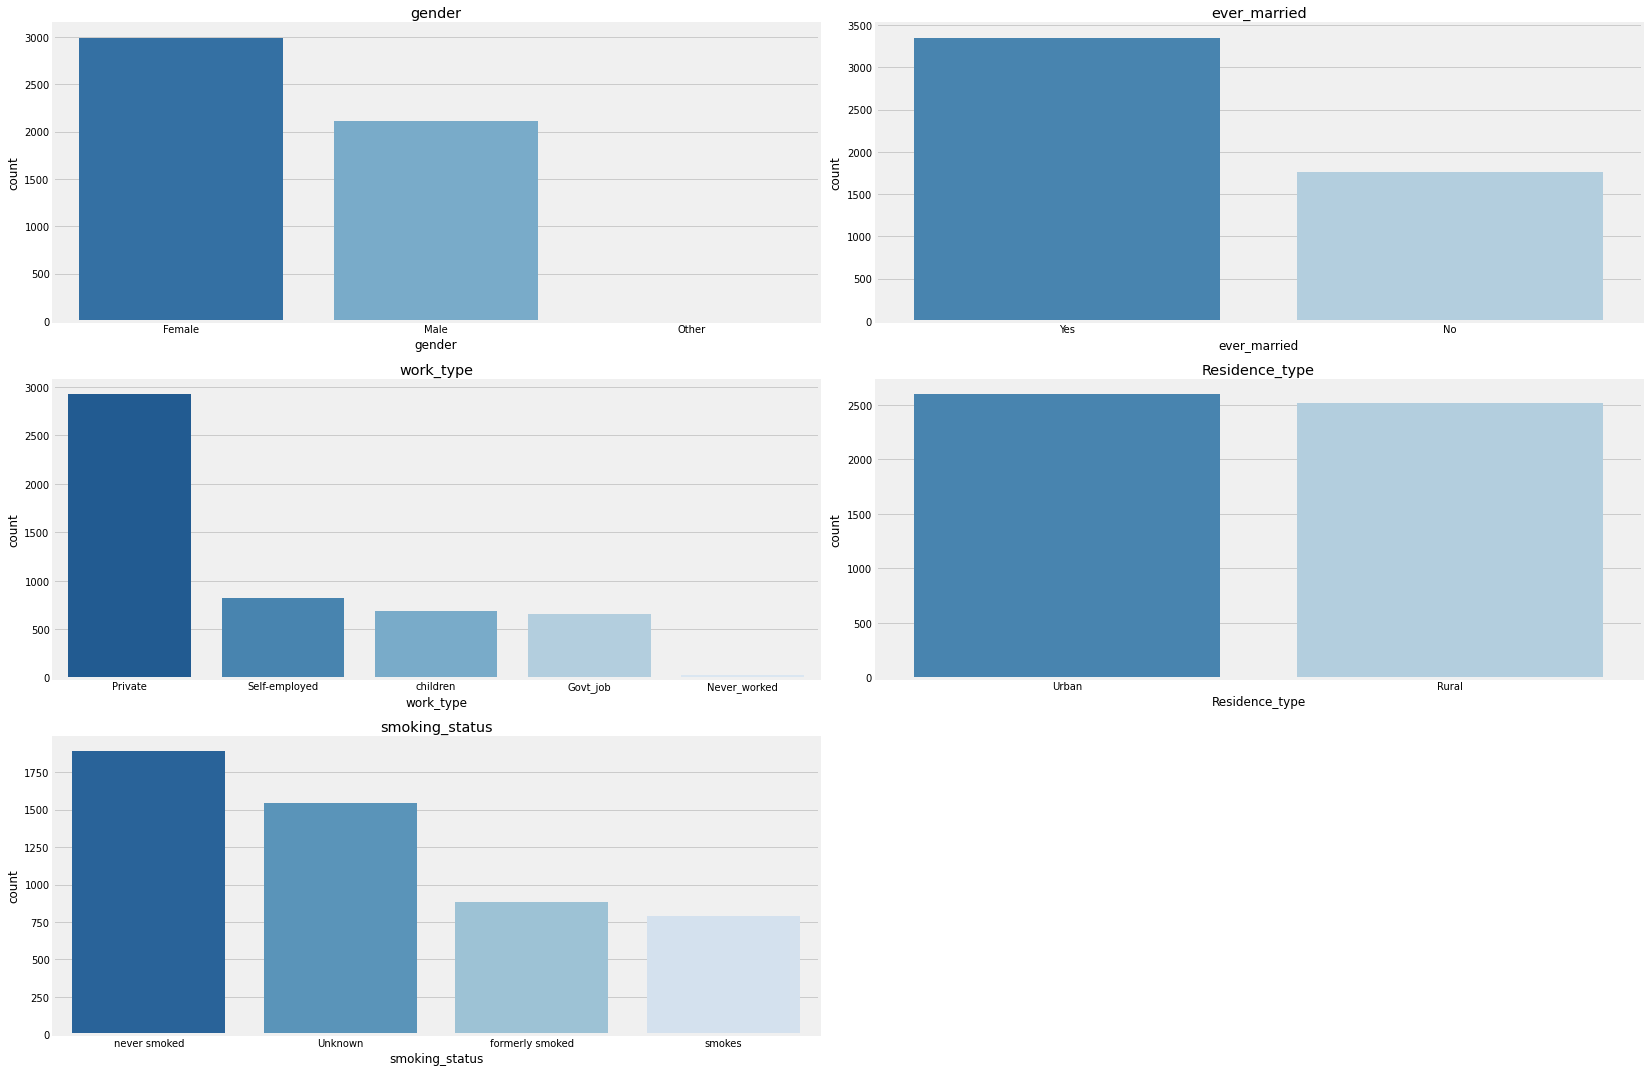

In [24]:
# plot all categorical features
plt.figure(figsize = (23, 15))
for i in range(len(ob_cols)):
    plt.subplot(len(ob_cols)//2+1, 2, i + 1)
    sns.countplot(
        x = dtc[ob_cols[i]],
        # order by frequency
        order = dtc[ob_cols[i]].value_counts().sort_values(ascending = False).index,
        palette="Blues_r"
    )
    plt.title(ob_cols[i], fontweight = 20)
plt.tight_layout()
plt.show()

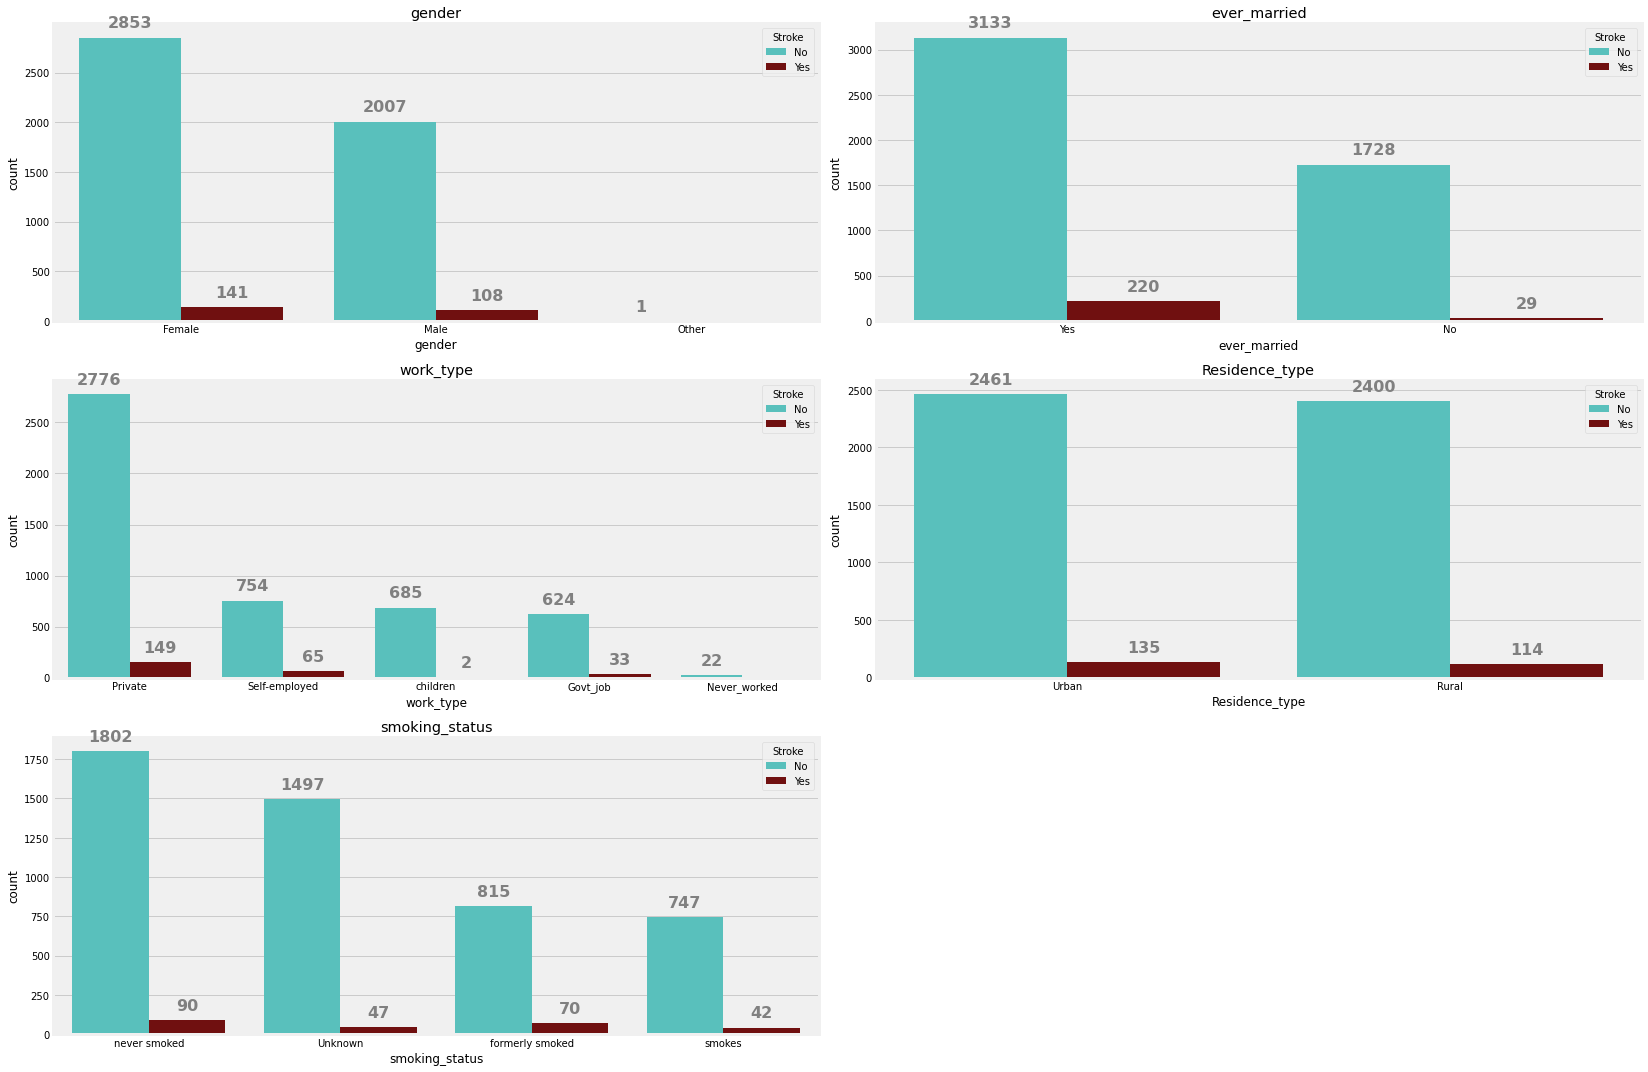

In [25]:
# plot all categorical features
plt.figure(figsize = (23, 15))
for i in range(len(ob_cols)):
    plt.subplot(len(ob_cols)//2+1, 2, i + 1)
    ax = sns.countplot(
        x = dtc[ob_cols[i]],
        hue = dtc['stroke'],
        # order by frequency
        order = dtc[ob_cols[i]].value_counts().sort_values(ascending = False).index,
        palette = {1:"maroon", 0:"mediumturquoise"}
    )
    plt.title(ob_cols[i], fontweight = 20)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 10), 
            textcoords = 'offset points',
            color = 'grey'
        )
        L = ax.legend(loc='upper right', title="Stroke")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

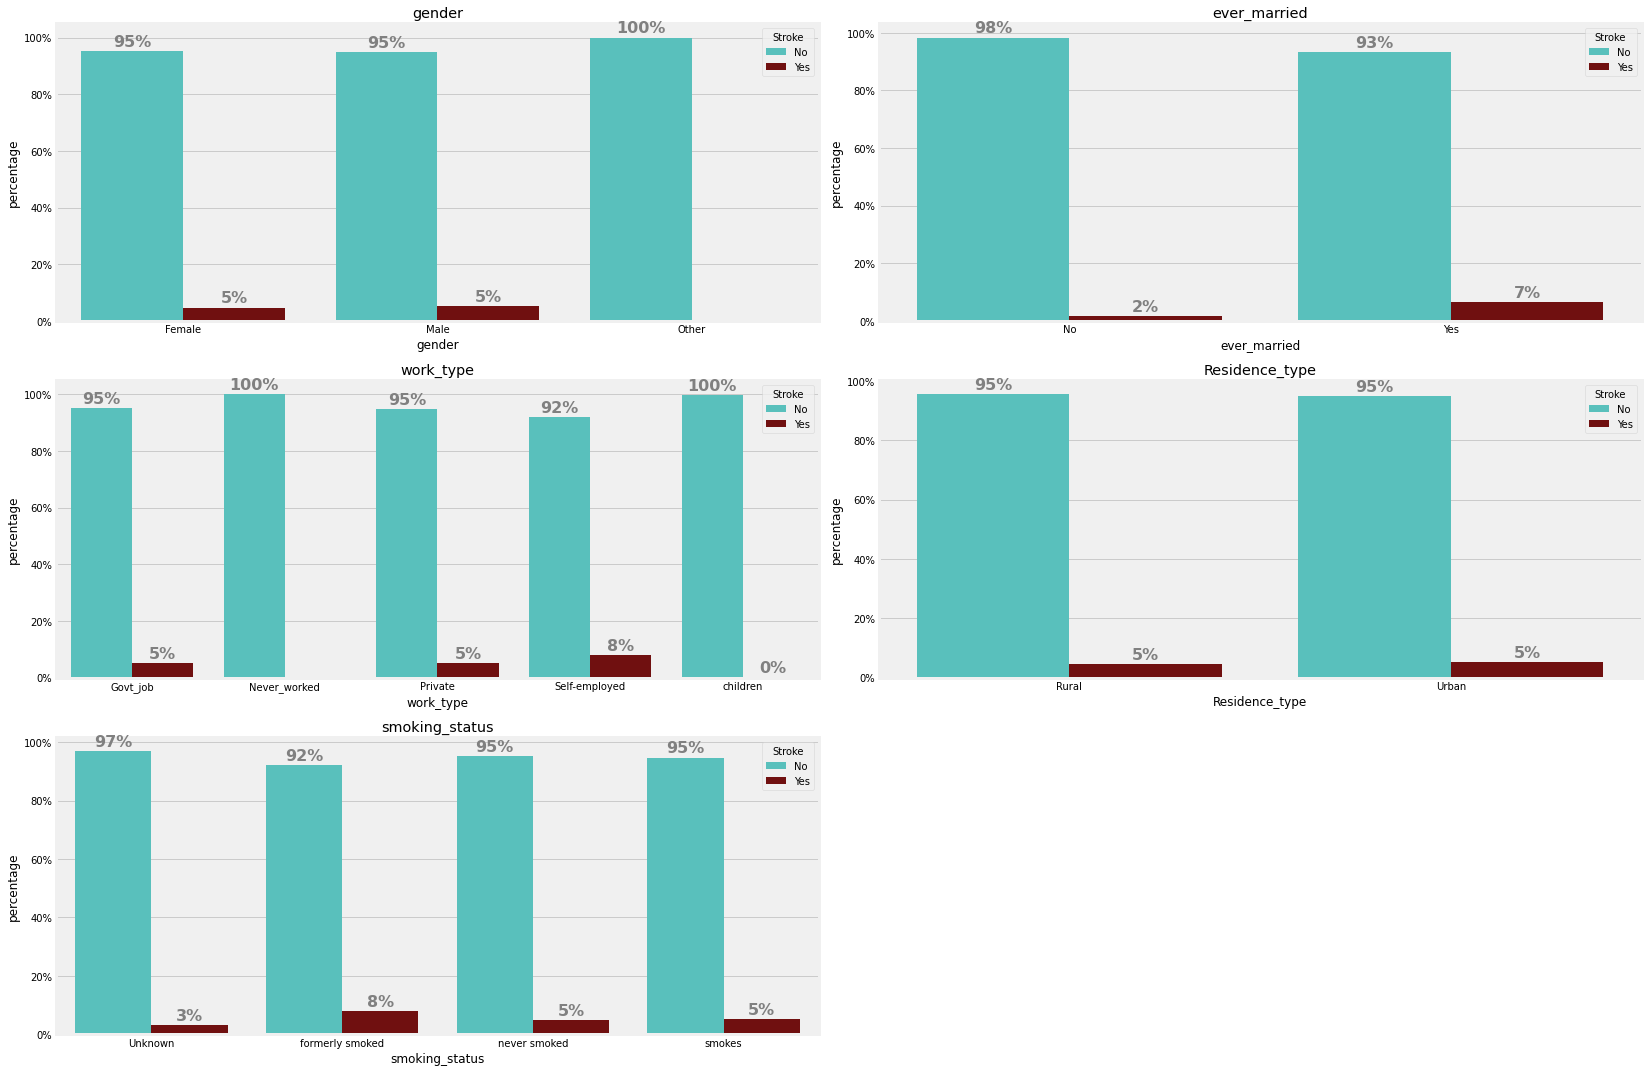

In [26]:
# plot all categorical features in percent
plt.figure(figsize = (23, 15))

for i in range(len(ob_cols)):
    # create percentage dtc
    dist = dtc.groupby([str(ob_cols[i]), "stroke"]).count()[["id"]]
    ob_group = dtc.groupby([str(ob_cols[i])]).count()[["id"]]
    dist["percentage"] = dist.div(ob_group, level = str(ob_cols[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(ob_cols[i]), "stroke", "count", "percentage"]
    
    # plot
    plt.subplot(len(ob_cols)//2+1, 2, i + 1)
    ax = sns.barplot(
        x = str(ob_cols[i]),
        y = "percentage",
        hue = "stroke",
        data = dist,
        palette = {1:"maroon", 0:"mediumturquoise"}
    )
    ax.set_title(ob_cols[i], fontweight = 20)
    
    # set yticks format
    y_ = [x for x in range(0, 120, 20)]
    plt.yticks(y_)
    ylabels = [format(y) + '%' for y in ax.get_yticks()]
    ax.set_yticklabels(labels = ylabels)
    
    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f') + "%",
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center',
            fontweight = 'semibold',
            size = 16,
            xytext = (0, 5), 
            textcoords = 'offset points',
            color = 'grey'
        )
        # set legend label
        L = ax.legend(loc='upper right', title="Stroke")
        L.get_texts()[0].set_text('No')
        L.get_texts()[1].set_text('Yes')
plt.tight_layout()
plt.show()

## **STEP 7 : CHECKING CORRELATION**

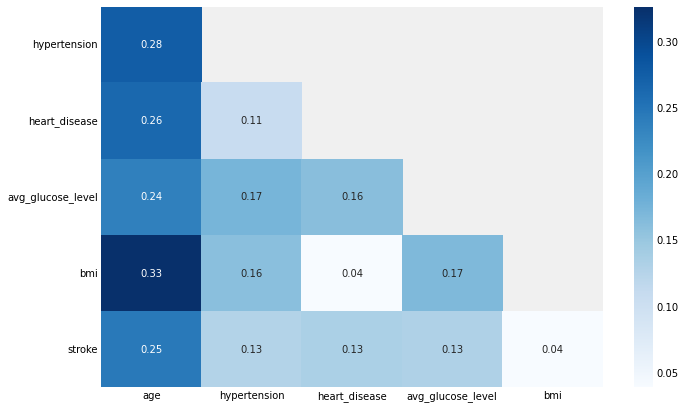

In [27]:
corr_ = dtc[num_cols + ['stroke']].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns = ['stroke'], index = ['age'])

plt.figure(figsize = (10, 7))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.2f',
    cmap = 'Blues'
)
plt.show()

## **STEP 8 : DATA PREPROCESSING**

In [28]:
dtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### **Categorical Feature Encoding**

In [29]:
dtc[ob_cols].columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [31]:
for i in range(len(ob_cols)):
    dummies = pd.get_dummies(dtc[ob_cols[i]], prefix = ob_cols[i])
    dtc = pd.concat([dtc, dummies], axis = 1)
    
dtc.drop(columns = ob_cols, inplace = True)

In [32]:
dtc

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


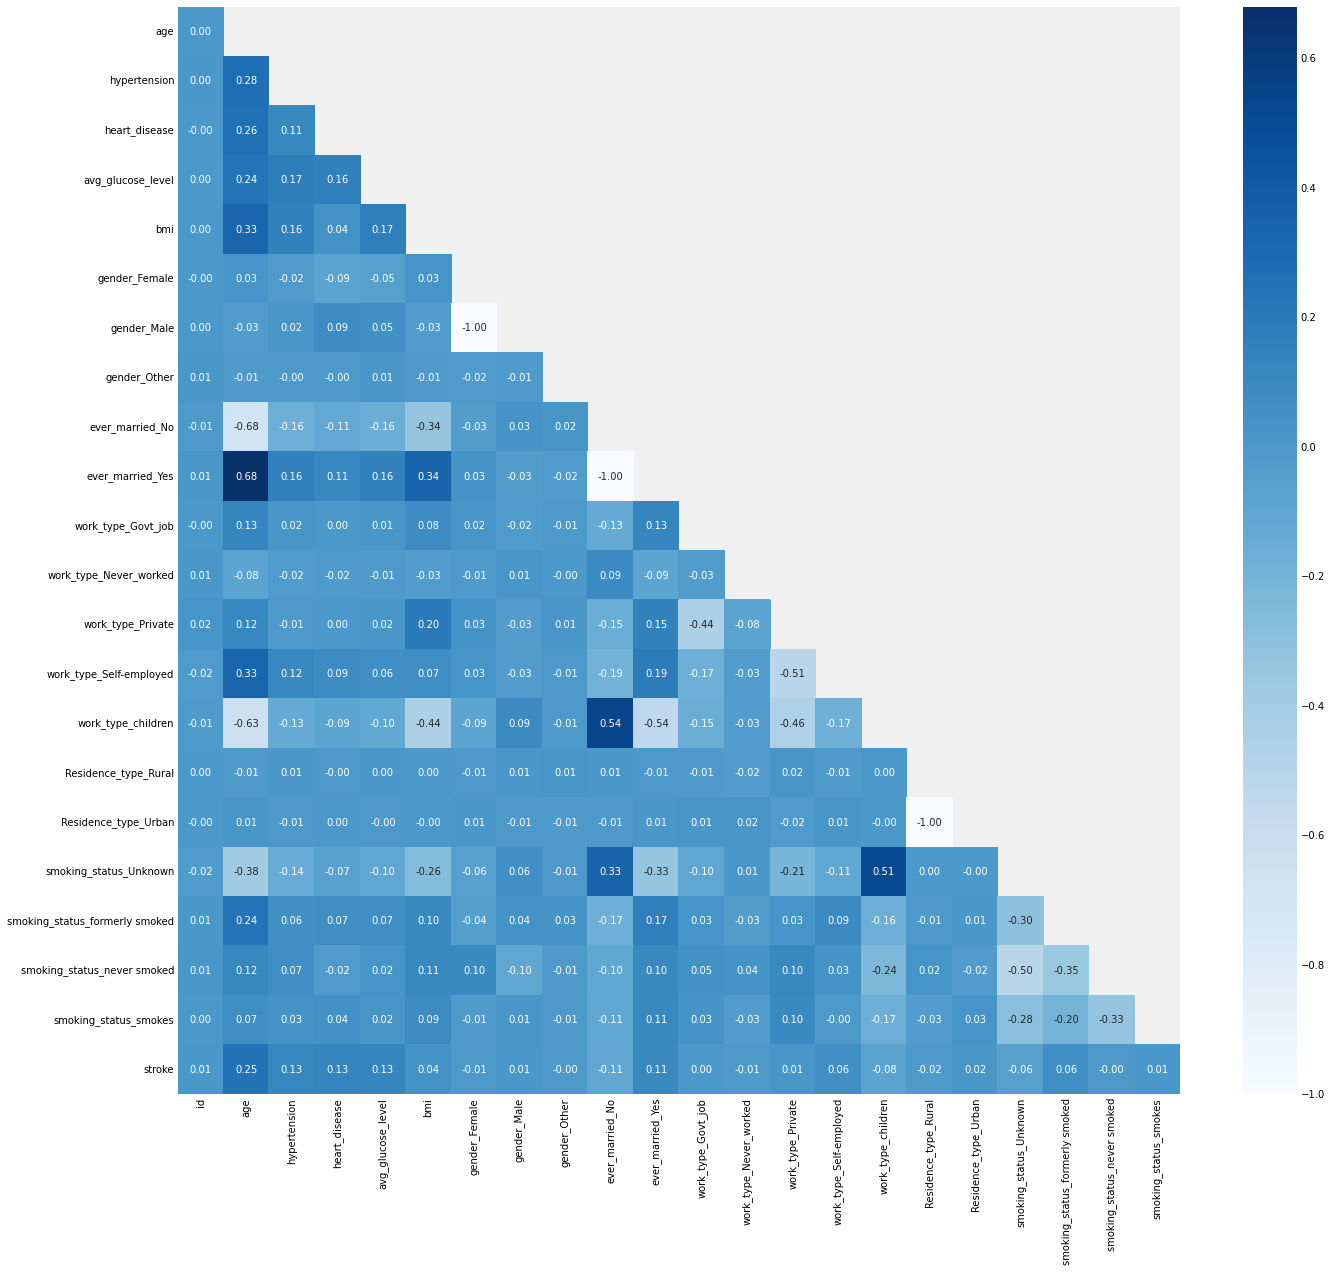

In [33]:
corr_ = dtc[list(dtc.drop(columns=["stroke"]).columns) + ["stroke"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns = ['stroke'], index = ['id'])

plt.figure(figsize = (20, 20))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.2f',
    cmap = 'Blues'
)
plt.show()

### **Preparing Features and Target**

In [35]:
X = dtc.drop(columns = ['id', 'stroke'], axis = 1)
y = dtc['stroke']

### **Split Data**

In [36]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = 77, stratify = y)

In [37]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/3, random_state = 77, stratify = y_)

In [38]:
print(len(X_train)/len(X), len(X_val)/len(X), len(X_test)/len(X))

0.7 0.2 0.1


**Checking the proportion**

In [39]:
print(sum(y_train==1)/len(y_train), sum(y_val==1)/len(y_val), sum(y_test==1)/len(y_test))

0.048644115180318706 0.04892367906066536 0.04892367906066536


### **Scaling**

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train_trf = scaler.transform(X_train)
X_val_trf = scaler.transform(X_val)
X_test_trf = scaler.transform(X_test)

## **STEP 9 : DEFINE MODEL**

In [42]:
svc1 = SVC(random_state = 77, kernel = 'rbf', )
svc2 = SVC(random_state = 77, kernel = 'rbf', degree = 4)
svc3 = SVC(random_state = 77, kernel = 'poly')
svc4 = SVC(random_state = 77, kernel = 'linear')
svc5 = SVC(random_state = 77, kernel = 'sigmoid')

In [43]:
models_dict = {}
models_dict["rbf"] = SVC(random_state = 77, kernel = 'rbf', )
models_dict["rbf (d=4)"] = SVC(random_state = 77, kernel = 'rbf', degree = 4)
models_dict["poly"] = SVC(random_state = 77, kernel = 'poly')
models_dict["linear"] = SVC(random_state = 77, kernel = 'linear')
models_dict["sigmoid"] = SVC(random_state = 77, kernel = 'sigmoid')

##**STEP 10 : TRAINING MODEL**

In [44]:
for model_name, model in models_dict.items():
    print(model_name)
    %time model.fit(X_train_trf, y_train)

rbf
CPU times: user 188 ms, sys: 1.6 ms, total: 190 ms
Wall time: 191 ms
rbf (d=4)
CPU times: user 183 ms, sys: 425 µs, total: 183 ms
Wall time: 181 ms
poly
CPU times: user 130 ms, sys: 1.04 ms, total: 131 ms
Wall time: 130 ms
linear
CPU times: user 64.1 ms, sys: 0 ns, total: 64.1 ms
Wall time: 64.5 ms
sigmoid
CPU times: user 117 ms, sys: 1.55 ms, total: 118 ms
Wall time: 116 ms


## **STEP 11 : MODEL VALIDATION**

In [45]:
val_pred_list = []
train_pred_list = []
pred_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model validation on {model_name}")
    val_pred = model.predict(X_val_trf)
    val_pred_list.append(val_pred)
    
    train_pred = model.predict(X_train_trf)
    train_pred_list.append(train_pred)
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart) * 1000, 2)
    print(f"{time_elapsed} ms")
    pred_time_elapsed.append(time_elapsed)

Model validation on rbf
134.1 ms
Model validation on rbf (d=4)
134.43 ms
Model validation on poly
63.45 ms
Model validation on linear
53.99 ms
Model validation on sigmoid
101.59 ms


In [46]:
val_scores_list = []
train_scores_list = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model validation on {model_name}")
    val_scores = model.decision_function(X_val_trf)
    val_scores_list.append(val_scores)
    
    train_scores = model.decision_function(X_train_trf)
    train_scores_list.append(train_scores)
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart) * 1000, 2)
    print(f"{time_elapsed} ms")

Model validation on rbf
136.11 ms
Model validation on rbf (d=4)
133.75 ms
Model validation on poly
62.38 ms
Model validation on linear
55.05 ms
Model validation on sigmoid
103.03 ms


## **STEP 12 : MODEL EVALUATION**

In [47]:
cm_train = []
cm_val = []
cl_train = []
cl_val = []
f1_train = []
f1_val = []
auc_train = []
auc_val = []
for y_pred in val_pred_list:
    cm_val.append(confusion_matrix(y_val, y_pred))  
    cl_val.append(classification_report(y_val, y_pred))
    f1_val.append(f1_score(y_val, y_pred))
    auc_val.append(roc_auc_score(y_val, y_pred))
for y_pred in train_pred_list:
    cm_train.append(confusion_matrix(y_train, y_pred))  
    cl_train.append(classification_report(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    auc_train.append(roc_auc_score(y_train, y_pred))

In [48]:
# create list to append fpr, tpr, and threshold val
fpr_val = []
tpr_val = []
precision_val = []
recall_val = []

# calculate curve val
for y_score in val_scores_list:
    fpr_val.append(roc_curve(y_val, y_score)[0])
    tpr_val.append(roc_curve(y_val, y_score)[1])
    precision_val.append(precision_recall_curve(y_val, y_score)[0])
    recall_val.append(precision_recall_curve(y_val, y_score)[1])

# create list to append fpr, tpr, and threshold tain
fpr_train = []
tpr_train = []
precision_train = []
recall_train = []

# calculate curve train
for y_score in train_scores_list:
    fpr_train.append(roc_curve(y_train, y_score)[0])
    tpr_train.append(roc_curve(y_train, y_score)[1])
    precision_train.append(precision_recall_curve(y_train, y_score)[0])
    recall_train.append(precision_recall_curve(y_train, y_score)[1])

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    '''
    ROC Curve plot with diagonal line
    '''
    plt.plot(fpr, tpr, linewidth=10, label=label, color = "navy")
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

def plot_precision_recall_curve(recall, precision, label=None):
    '''
    Precison-Recall Curve plot with diagonal line
    '''
    plt.plot(recall, precision, linewidth=10, label=label, color = "navy")
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('Recall', fontsize=16) # Not shown
    plt.ylabel('Precision', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [50]:
print("TEST")
for i, cm, in zip((range(len(models_dict.keys()))), cm_val):
    print(f"Confusion Matrix {list(models_dict.keys())[i]}:")
    print(cm)
    
for i, cl, in zip((range(len(models_dict.keys()))), cl_val):
    print(f"Classification Report {list(models_dict.keys())[i]}:")
    print(cl)

for i, f1 in zip((range(len(models_dict.keys()))), f1_val):
    print(f"F1 {list(models_dict.keys())[i]}:")
    print(f1)
print("\n")

for i, auc, in zip((range(len(models_dict.keys()))), auc_val):
    print(f"AUC {list(models_dict.keys())[i]}:")
    print(auc)

TEST
Confusion Matrix rbf:
[[972   0]
 [ 50   0]]
Confusion Matrix rbf (d=4):
[[972   0]
 [ 50   0]]
Confusion Matrix poly:
[[968   4]
 [ 50   0]]
Confusion Matrix linear:
[[972   0]
 [ 50   0]]
Confusion Matrix sigmoid:
[[958  14]
 [ 46   4]]
Classification Report rbf:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Classification Report rbf (d=4):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Classification Report poly:
              

In [51]:
print("TRAIN")
for i, cm, in zip((range(len(models_dict.keys()))), cm_train):
    print(f"Confusion Matrix {list(models_dict.keys())[i]}:")
    print(cm)
    
for i, cl, in zip((range(len(models_dict.keys()))), cl_train):
    print(f"Classification Report {list(models_dict.keys())[i]}:")
    print(cl)
    
for i, f1 in zip((range(len(models_dict.keys()))), f1_train):
    print(f"F1 {list(models_dict.keys())[i]}:")
    print(f1)
print("\n")

for i, auc, in zip((range(len(models_dict.keys()))), auc_train):
    print(f"AUC {list(models_dict.keys())[i]}:")
    print(auc)

TRAIN
Confusion Matrix rbf:
[[3403    0]
 [ 173    1]]
Confusion Matrix rbf (d=4):
[[3403    0]
 [ 173    1]]
Confusion Matrix poly:
[[3402    1]
 [ 158   16]]
Confusion Matrix linear:
[[3403    0]
 [ 174    0]]
Confusion Matrix sigmoid:
[[3328   75]
 [ 170    4]]
Classification Report rbf:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       1.00      0.01      0.01       174

    accuracy                           0.95      3577
   macro avg       0.98      0.50      0.49      3577
weighted avg       0.95      0.95      0.93      3577

Classification Report rbf (d=4):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       1.00      0.01      0.01       174

    accuracy                           0.95      3577
   macro avg       0.98      0.50      0.49      3577
weighted avg       0.95      0.95      0.93      3577

Classification Report

### **Visualization**

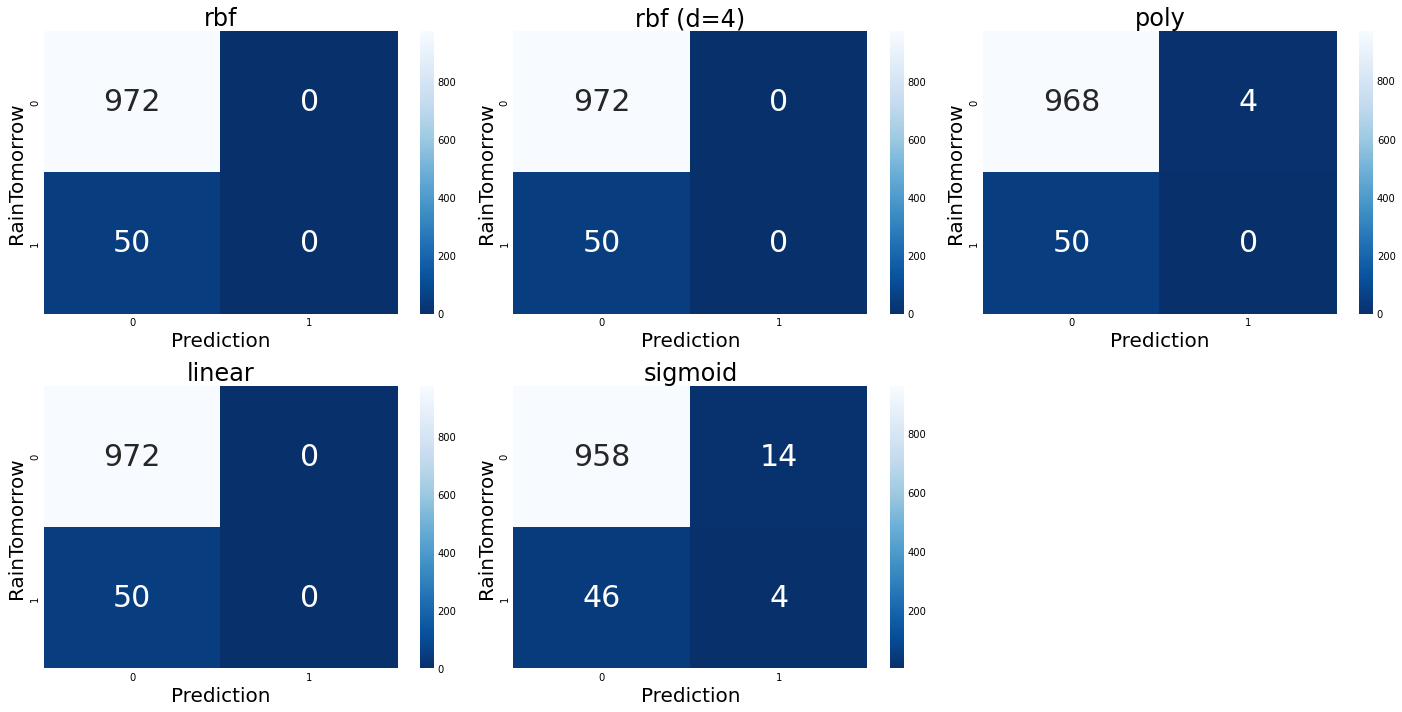

In [52]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(list(models_dict.keys()))):
    plt.subplot(len(list(models_dict.keys()))//3+1, 3, i + 1)
    sns.heatmap(
        cm_val[i],
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r',
        annot_kws={"fontsize":30}
    )
    plt.xlabel("Prediction", fontsize = 20)
    plt.ylabel("RainTomorrow", fontsize = 20)
    plt.title(str(list(models_dict.keys())[i]), fontsize = 24)
plt.tight_layout()
plt.show()

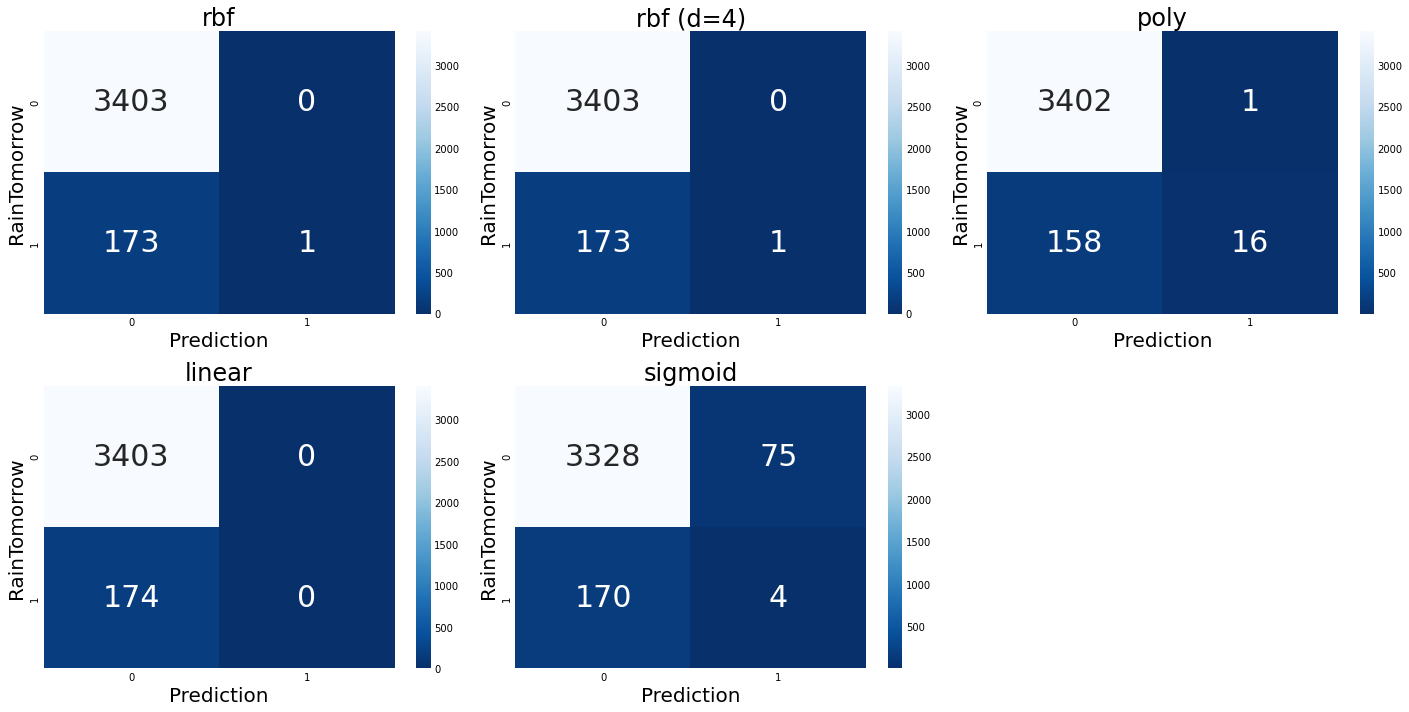

In [53]:
# plot all numerical features
plt.figure(figsize = (20, 10))
for i in range(len(list(models_dict.keys()))):
    plt.subplot(len(list(models_dict.keys()))//3+1, 3, i + 1)
    sns.heatmap(
        cm_train[i],
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r',
        annot_kws={"fontsize":30}
    )
    plt.xlabel("Prediction", fontsize = 20)
    plt.ylabel("RainTomorrow", fontsize = 20)
    plt.title(str(list(models_dict.keys())[i]), fontsize = 24)
plt.tight_layout()
plt.show()

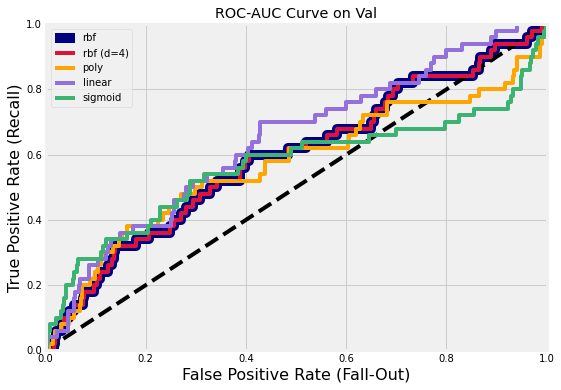

In [54]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_val[0], tpr_val[0], label=list(models_dict.keys())[0])
plt.plot(fpr_val[1], tpr_val[1], label=list(models_dict.keys())[1], color = "crimson")
plt.plot(fpr_val[2], tpr_val[2], label=list(models_dict.keys())[2], color = "orange")
plt.plot(fpr_val[3], tpr_val[3], label=list(models_dict.keys())[3], color = "mediumpurple")
plt.plot(fpr_val[4], tpr_val[4], label=list(models_dict.keys())[4], color = "mediumseagreen")
plt.title("ROC-AUC Curve on Val")
plt.legend()
plt.show()

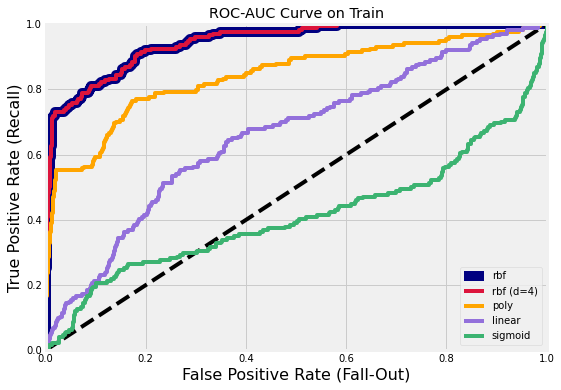

In [55]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_train[0], tpr_train[0], label=list(models_dict.keys())[0])
plt.plot(fpr_train[1], tpr_train[1], label=list(models_dict.keys())[1], color = "crimson")
plt.plot(fpr_train[2], tpr_train[2], label=list(models_dict.keys())[2], color = "orange")
plt.plot(fpr_train[3], tpr_train[3], label=list(models_dict.keys())[3], color = "mediumpurple")
plt.plot(fpr_train[4], tpr_train[4], label=list(models_dict.keys())[4], color = "mediumseagreen")
plt.title("ROC-AUC Curve on Train")
plt.legend()
plt.show()

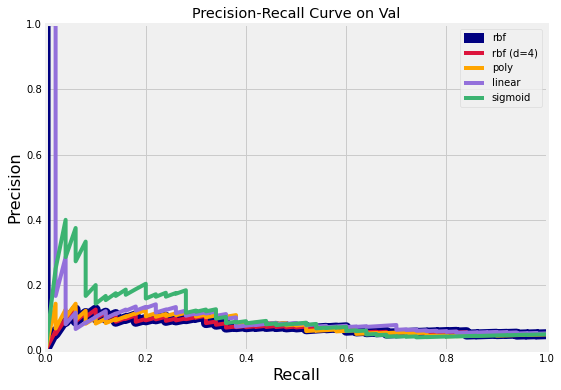

In [56]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_precision_recall_curve(recall_val[0], precision_val[0], label=list(models_dict.keys())[0])
plt.plot(recall_val[1], precision_val[1], label=list(models_dict.keys())[1], color = "crimson")
plt.plot(recall_val[2], precision_val[2], label=list(models_dict.keys())[2], color = "orange")
plt.plot(recall_val[3], precision_val[3], label=list(models_dict.keys())[3], color = "mediumpurple")
plt.plot(recall_val[4], precision_val[4], label=list(models_dict.keys())[4], color = "mediumseagreen")
plt.title("Precision-Recall Curve on Val")
plt.legend()
plt.show()

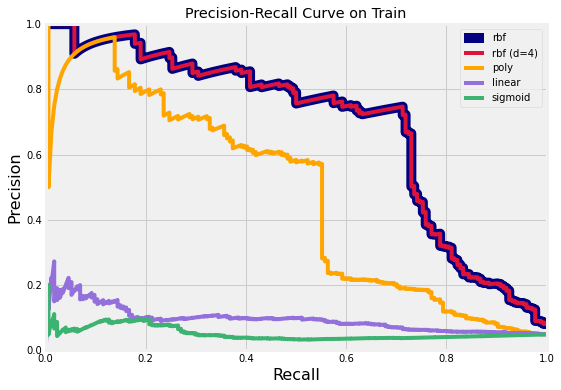

In [57]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_precision_recall_curve(recall_train[0], precision_train[0], label=list(models_dict.keys())[0])
plt.plot(recall_train[1], precision_train[1], label=list(models_dict.keys())[1], color = "crimson")
plt.plot(recall_train[2], precision_train[2], label=list(models_dict.keys())[2], color = "orange")
plt.plot(recall_train[3], precision_train[3], label=list(models_dict.keys())[3], color = "mediumpurple")
plt.plot(recall_train[4], precision_train[4], label=list(models_dict.keys())[4], color = "mediumseagreen")
plt.title("Precision-Recall Curve on Train")
plt.legend()
plt.show()

In [58]:
for i, auc in zip((range(len(models_dict.keys()))), auc_val):
    print(f"AUC {list(models_dict.keys())[i]}:")
    print(auc)
print("\n")
for i, auc in zip((range(len(models_dict.keys()))), auc_train):
    print(f"AUC {list(models_dict.keys())[i]}:")
    print(auc)
print("\n")

AUC rbf:
0.5
AUC rbf (d=4):
0.5
AUC poly:
0.49794238683127573
AUC linear:
0.5
AUC sigmoid:
0.5327983539094651


AUC rbf:
0.5028735632183908
AUC rbf (d=4):
0.5028735632183908
AUC poly:
0.5458300823141177
AUC linear:
0.5
AUC sigmoid:
0.5004745643634251




##**STEP 13 : MODEL INFERENCE**

In [59]:
pred_poly = models_dict["poly"].predict(X_test_trf)
pred_sigmoid = models_dict["sigmoid"].predict(X_test_trf)

In [60]:
res = pd.DataFrame({
    "Poly Prediction": pred_poly,
    "Sigmoid Prediction": pred_sigmoid
})

In [61]:
res.groupby(["Poly Prediction"]).count()

,Sigmoid Prediction
Poly Prediction,
0,505
1,6


In [62]:
res.groupby(["Sigmoid Prediction"]).count()

,Poly Prediction
Sigmoid Prediction,
0,506
1,5


In [63]:
print("Poly AUC:",roc_auc_score(y_test, pred_poly))
print("Sigmoid AUC:",roc_auc_score(y_test, pred_sigmoid))

Poly AUC: 0.5358847736625515
Sigmoid AUC: 0.5158847736625515


##**STEP 14 : KESIMPULAN**

Bahkan setelah mencoba SVM, terutama parameter kernel, kinerjanya masih belum membaik. Hanya ada sedikit perbedaan antara skor AUC masing-masing model. Masalah dalam percobaan pemodelan ini adalah bahwa semua model kurang sesuai dengan data karena kinerja dan validasi sangat rendah.